# Classification in ML

- It's a type of supervised learning where the goal is to categorize data into predefined classes
- The model is trained to predict the class label of a given input data. e.g. Titanic (survived vs not survived), image classification for plants, Likelihood of foreclosure on mortgages
- Types:
    - **Binary Classification**: 2 classes/categories (o or 1 | True or False) e.g. Spam vs Ham emails
    - **Multi-class Classification**: more than 2 classes e.g. School grade A, B, C, D or Handwritten digits (0 to 9)
    - **Imbalanced Classification**: when the distribution of classes is not balanced/uniform, when some classes have much higher data points than other. e.g. Fraud detection (200 fraud vs 1Mil good transactions), anomaly detection
    - **Ordinal Classification**: A type of classification that the classes have a natural order. e.g. movie rating 1 to 5
    - **Multi-label Classification**: unlike multi-class classification, where each instance is assigned to 1 label, Multi-label is where an instance can belong to multiple classes/categories. e.g. A movie that belongs to multiple categories Action and SciFi
    - **Hierarchical Classification**: involves classifying data into a hierarchy, where classes are structures in tree-like format. e.g. Animal Family -> Genus -> Species 
- Common Algorithms:
    - Logistic Regression (Binary Classification)
    - Decision Trees 
    - Random Forest
    - Support Vector Machines (SVM)
    - k-Nearest Neighbor (kNN)
    - Naive Bayes 
    - Gradient Boosting Machines (GBM)


## Exercise - Classification and Model Evaluation Using SVM

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn import svm #support vector machines
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay #classification performance evaluation

In [154]:
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'/heart.txt')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


- age
- sex (1 M and 0 F)
- chest pain type (4 values)
- RestBP: resting blood pressure
- Chol: serum cholestoral in mg/dl
- Fbs: fasting blood sugar > 120 mg/dl
- RestECG: resting electrocardiographic results (values 0,1,2)
- MaxHR: maximum heart rate achieved
- ExAng: exercise induced angina
- Oldpeak: ST depression induced by exercise relative to rest
- Slope: the slope of the peak exercise ST segment
- Ca: number of major vessels (0-3) colored by flourosopy
- Thal: thalassemia normal; fixed defect; reversable defect
- AHD (Target) Acquired Heart Disease

### EDA

In [155]:
df['AHD'].value_counts(normalize=True)

AHD
No     0.541254
Yes    0.458746
Name: proportion, dtype: float64

In [156]:
df['ChestPain'].value_counts()

ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [158]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [159]:
# get the avg age by AHD 
df.groupby('AHD')[['Age']].agg(['mean','median'])

Age       
          mean median
AHD                  
No   52.585366   52.0
Yes  56.625899   58.0

In [160]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


<Axes: xlabel='Age', ylabel='Chol'>

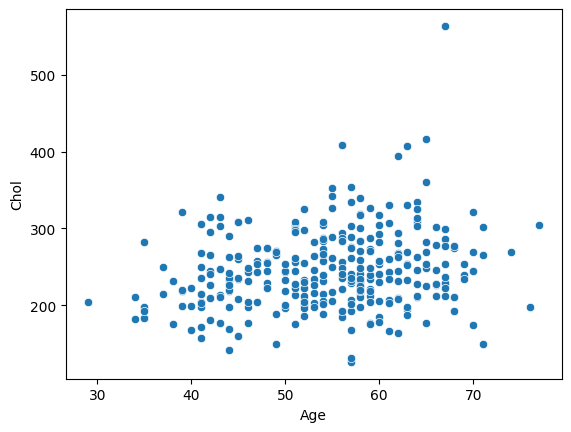

In [161]:
sns.scatterplot(data=df, x='Age', y='Chol')

### Data Preprocessing 

In [162]:
df_org = df.copy()

In [163]:
df = pd.get_dummies(df, columns=['ChestPain', 'Thal'], dtype=int)

In [164]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,No,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,Yes,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,Yes,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,No,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,No,0,0,1,0,0,1,0


In [165]:
# split the data
X = df.drop(columns='AHD', axis=1)
y = df['AHD']

In [166]:
#standardization
MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

### Deploying SVM
- Support Vector Machines is powerful and common ML algorithm
- It can be used for both regression and classification:
    - Support Vector Regressor (Regression)
    - Support Vector Classifier (Classification)
- SVM searches for a hyperplane that best separates the classes in the feature space. It's also called decision boundry.
- Other components:
    - **Support Vector:** data points that are the closest to the hyperplane
    - **Margins:** the distance between the hyperplane and the support vectors
    - **Kernels:** kernel trick gives SVM the ability to handle non-linear relationships

![SVM](https://datatron.com/wp-content/uploads/2021/05/Support-Vector-Machine.png)

Hyperparameters:
- `C` the regularization intensity
- `gamma` It controls the width of the kernel Gaussian to adjust the smoothness of the decision boundary.
- `kernel` it adjusts the algorithm to work with linear, polynomial, sigmoid, or radial basis relationship. It basically addresses the data complexity with the target. It will determine how the data will be separated.

![g](https://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_001.png)

![gmma with kernel](https://amueller.github.io/aml/_images/svm_c_gamma.png)

In [168]:
SVC_Model = svm.SVC()

param_grid = {
                'C': [1,5,10,100,1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['linear', 'rbf', 'sigmoid']
                }


`verbose`: Controls the verbosity: the higher, the more messages.

- 1 : the computation time for each fold and parameter candidate is displayed;
- 2 : the score is also displayed;
- 3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

Let's use StratifiedKFold as it maintains the same class distribution across folds


In [169]:
# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [170]:
gs_svc_model = GridSearchCV(SVC_Model, param_grid, verbose=3, cv=skf)

In [171]:
gs_svc_model.fit(X_train, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits
[CV 1/4] END .......C=1, gamma=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 2/4] END .......C=1, gamma=1, kernel=linear;, score=0.836 total time=   0.0s
[CV 3/4] END .......C=1, gamma=1, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/4] END .......C=1, gamma=1, kernel=linear;, score=0.850 total time=   0.0s
[CV 1/4] END ..........C=1, gamma=1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 2/4] END ..........C=1, gamma=1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 3/4] END ..........C=1, gamma=1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 4/4] END ..........C=1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/4] END ......C=1, gamma=1, kernel=sigmoid;, score=0.574 total time=   0.0s
[CV 2/4] END ......C=1, gamma=1, kernel=sigmoid;, score=0.557 total time=   0.0s
[CV 3/4] END ......C=1, gamma=1, kernel=sigmoid;, score=0.467 total time=   0.0s
[CV 4/4] END ......C=1, gamma=1, kernel=sigmoid

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 5, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [172]:
print(gs_svc_model.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}


In [173]:
GS_accuracy = gs_svc_model.best_score_
GS_accuracy

0.8637295081967213

> Accuracy is not the only measure we can use for Classification performance evaluation. We'll learn about additional metrics below.

## Performance Measurement

> In order to understand how the performance metrics are derived, we need to build a confusion matrix

#### Confusion Matrix

In [174]:
# get the predicted values
y_test_hat = gs_svc_model.best_estimator_.predict(X_test)

In [175]:
#build the confusion matrix
CM_SVC = confusion_matrix(y_test, y_test_hat)
CM_SVC

array([[29,  3],
       [ 6, 23]])

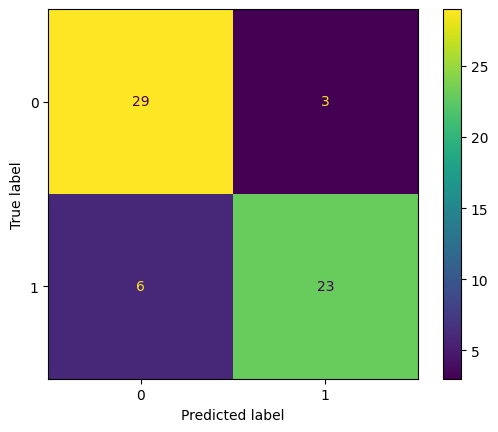

In [176]:
# the best way to see the results 
CM_SVC_Disp = ConfusionMatrixDisplay(confusion_matrix=CM_SVC)
CM_SVC_Disp.plot()

- We have 8 cases (5 + 3) where the model misclassified the prediction for AHD
- 5 cases where we incorrectly predicted the patient to _not have AHD_, where they do have it in the actual data.
- 3 cases where we incorrectly predicted the patient to _have AHD_, where they do not have it in the actual data.
- For each quad we have a name: (Positive = 1 and Negative = 0)
    - True Negative: 29 cases
    - True Positive: 24 cases
    - False Positive [Type I Errors]: 3 cases (incorrectly predicted positive cases)
    - False Negative [Type II Errors]: 5 cases (incorrectly predicted negative cases)
- The goal is to reduce the number of FP and FN. 
- In some scenarios, it's hard to lower both numbers and we have to prioritize improving one over the other. This will be based on the **Business Scenario**. For example:
    - If we do not identify the patients with AHD correctly, they may have bad health consequences. Therefore, it's more important to reduce FN.
    - Suppose the patients identified with AHD get a treatment that could improve the health of the ones that truly have it, but yield much worse consequences for the ones that don't have. In this scenario, it would better to improve FP.

In [177]:
29 + 3 + 5 + 24

61

In [178]:
len(y_test)

61

##### Evaluation Metrics

From the Confusion Matrix, we can derive 4 metrics:
- **Accuracy** 
    - Formula: $(TP+TN)/(TP+TN+FP+FN)$
    - Description: the ratio of correctly predicted instances to the total instances. 
    - Use Case: It's a simple/straightforward metric, but sensitive to imbalanced dataset. It's always recommended to use additional metrics.
- **Precision** (Also called **Positive Predictive Value**)
    - Formula: $TP/(TP+FP)$
    - Description: It's the ratio of _correctly_ predicted positives to the total of all predicted positives.
    - Use Case: It's important when the cost of FP is high.
- **Sensitivity** (Also called **Recall** or **True Positive Rate**)
    - Formula: $TP/(TP+FN)$
    - Description: It's the ratio of _correctly_ predicted positives to all _original/actual_ positives.
    - Use Case: It's important when the cost of FN is high.
- **Specificity** (Also called **True Negative Rate**)
    - Formula: $TN/(TN+FP)$
    - Description: It's the ratio of _correctly_ predicted negatives to all _original/actual_ negatives.
- **F1 Score**
    - Formula: $F1 Score = 2 * (Precision * Recall)/(Precision + Recall)$
    - Description: It's the harmonic mean of **Precision** and **Recall**.
    - Use Case: It's useful when you want to balance between **Precision** and **Recall**.


![cm](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEicyOwn09o1imx_g5itoPx9z7a18rffv9qeBoUyVhMqqEu7_o1Hw7lSeg1Th9GMHEZi1i-bZOOtO92t7S9G0daeKKngzbISY0KXEtBh9dbf-9fcGB9OzQb1Pg2WChV7ZXVHPkrjG9SpEg/s1600/ConfusionMatrix.png)

**Summary**
- For the AHD prediction model, **Sensitivity** is the most impactful metric for medical use case:
    - It's crucial to identify as many AHD patients (at risk) as possible.
    - Missing a true positive (a patient that's actually at risk) can have serious or even fatal consequences.
    - The high sensitivity ensures that the model catches most of the patients who are at risk, even if it means accepting some False Positives.
- The second most important metric is **Specificity** (high True Negative Rate) because having high **sensitivity** and low **specificity** could result in many false positives, which could cause unnecessary medical cost, testing, and stress on the staff (due to the intevention of patients that are not actually at risk)

> No need to calculate the metrics above by hand or memorize the formulas. We can basically use the `classification_report` function to get all the results.

In [179]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87        32
         Yes       0.88      0.79      0.84        29

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



## Visualization (For Demonstration Purposes)

In [180]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Drop missing values and preprocess
df = df.dropna()

# Select features and the target label
features = ['Age', 'Chol', 'MaxHR']
X = df[features].values
y = df['AHD'].map({'Yes': 1, 'No': 0}).values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model with a linear kernel
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear'))

# Fit the model
clf.fit(X_train, y_train)

# Create a grid to evaluate the model
xx, yy, zz = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 30),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 30),
    np.linspace(X[:, 2].min(), X[:, 2].max(), 30)
)

grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
decision_values = clf.decision_function(grid)
decision_values = decision_values.reshape(xx.shape)

# Plot the 3D scatter plot
fig = go.Figure()

# Add scatter plot for the two classes
fig.add_trace(go.Scatter3d(
    x=X[y == 0, 0], y=X[y == 0, 1], z=X[y == 0, 2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Class 0'
))

fig.add_trace(go.Scatter3d(
    x=X[y == 1, 0], y=X[y == 1, 1], z=X[y == 1, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Class 1'
))

# Add decision boundary as a surface plot
fig.add_trace(go.Surface(
    x=xx[:, :, 0], y=yy[:, :, 0], z=-zz[:, :, 0],
    surfacecolor=(decision_values < 0).astype(int),
    colorscale='RdBu',
    opacity=0.3,
    showscale=False
))

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title=features[0],
        yaxis_title=features[1],
        zaxis_title=features[2],
    ),
    title='3D Scatter Plot with Decision Boundary',
    showlegend=True
)

# Show the plot
fig.show()


# Use Decision Tree and Visualize

In [181]:
from sklearn.tree import DecisionTreeClassifier


> perform this again since the Viz cleared the values of X and y

In [182]:
# split the data
X = df.drop(columns='AHD', axis=1)
y = df['AHD']

#standardization
MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

In [183]:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [184]:
from sklearn import tree
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_16 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_9 <= 0.25
|   |   |   |--- class: No
|   |   |--- feature_9 >  0.25
|   |   |   |--- class: Yes
|   |--- feature_11 >  0.50
|   |   |--- feature_8 <= 0.08
|   |   |   |--- class: Yes
|   |   |--- feature_8 >  0.08
|   |   |   |--- class: Yes
|--- feature_16 >  0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_8 <= 0.40
|   |   |   |--- class: No
|   |   |--- feature_8 >  0.40
|   |   |   |--- class: Yes
|   |--- feature_11 >  0.50
|   |   |--- feature_10 <= 0.17
|   |   |   |--- class: No
|   |   |--- feature_10 >  0.17
|   |   |   |--- class: Yes



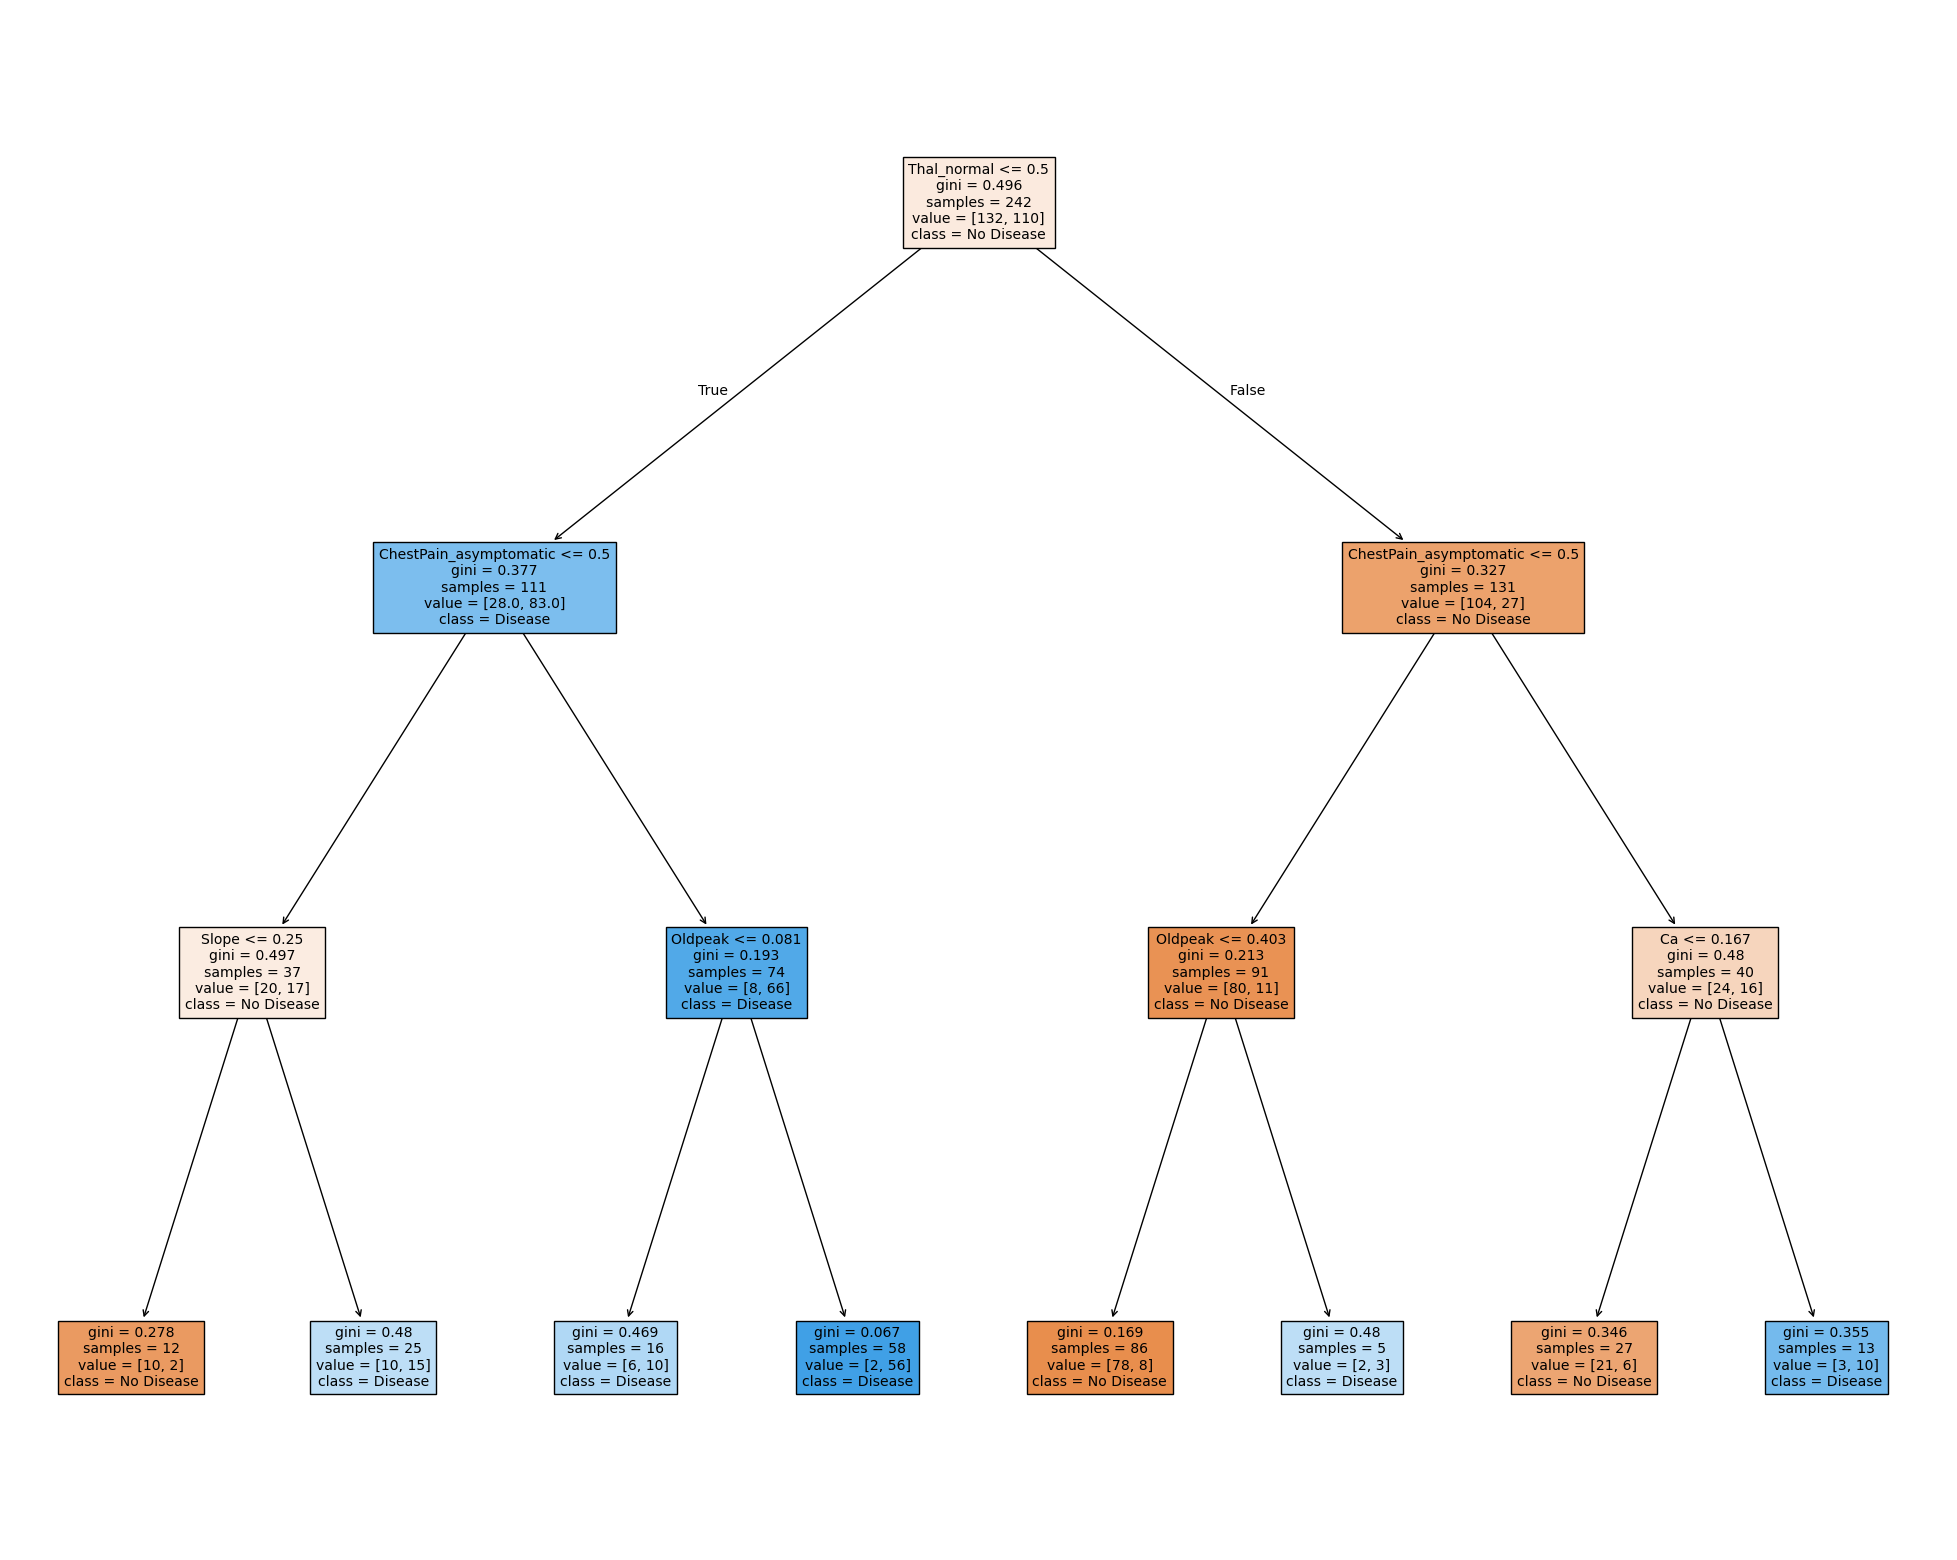

In [185]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model,
                   feature_names=df.drop(columns='AHD').columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)

# Side-by-Side Model Evaluation

Text(627.9949494949494, 0.5, '')

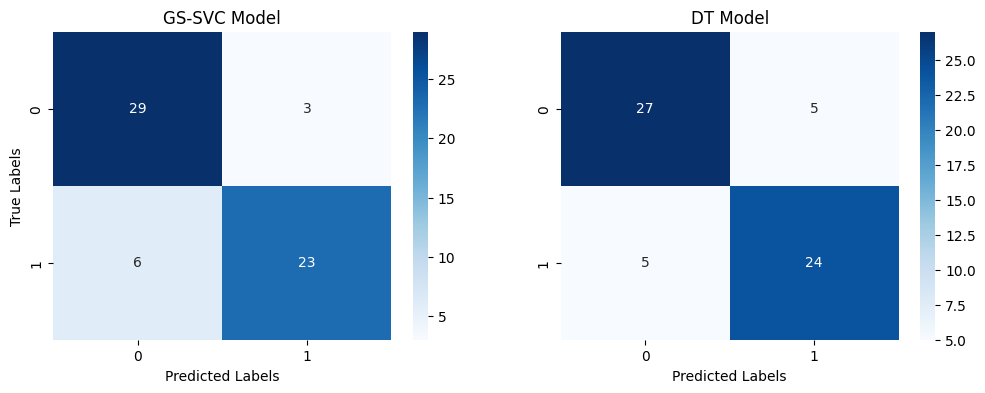

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions from your models
y_pred_gs_svc = gs_svc_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# True labels
y_true = y_test

# Create confusion matrices
cm_gs_svc = confusion_matrix(y_true, y_pred_gs_svc)
cm_dt = confusion_matrix(y_true, y_pred_dt)

# Plot confusion matrices side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(cm_gs_svc, annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title('GS-SVC Model')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

sns.heatmap(cm_dt, annot=True, cmap='Blues', ax=axs[1])
axs[1].set_title('DT Model')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('')

